# Курс по машинному обучению,   ВМК МГУ
# KNN: Классификация и регрессия

### Важно! О формате сдачи

* **Задания из ноутбука, за исключением двух заданий на реализацию кода, оцениваются по системе <font color='red'>кросс-рецензирования</font>.**
* **При решении ноутбука используйте данный шаблон. Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий. Добавлять свои ячейки, при необходимости, конечно можно**
* **Везде, где в формулровке задания есть какой-либо вопрос (или просьба вывода), необходимо прописать ответ в ячейку (код или markdown).**
* **Наличие кода решения обязательно. Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.**

### Важно!

**Перед тем, как сдать ноутбук на кросс-рецензирование, мы рекомендуем перезапустить ядро и выполнить весь ноутбук (cell -> run all)**

# Часть 0. Знакомство с библиотекой scikit-learn

Scikit-learn - это библиотека машинного обучения с открытым исходным кодом, которая предоставляет различные инструменты для предобработки данных и обучения моделей.

Каждый модуль предобработки данных имеет два метода: fit и transform. Как правило, метод fit принимает на вход **обучающую** выборку $X$ и считает по ней необходимые для заданного типа преобразования статистики. Метод transform преобразует входные **(train и test)** данные, используя статистики, посчитанные при вызове метода fit и возвращает преобразованные данные.

Каждая модель машинного обучения имеет два метода: fit - метод ответственный за обучения модели и predict - метод ответственный за предсказание целевой переменной. Многие модели имеют метод predcit_proba, который возвращает вероятность принадлежности объекта к каждому из классов. Как правило, метод fit принимает на вход два аргумента: $X$ - **обучающая** выборка, $y$ - значения целевых переменных на объектах обучающей выборки. Метод predict принимает на вход набор данных и выдает предсказанные значения целевых переменных на этом наборе данных.

Более подробно про библиотеку можно прочитать в документации по [ссылке](https://scikit-learn.org/stable/index.html)

# Часть 1. Нормализация признакового пространства

В задачах машинного обучения важную роль играет нормализация данных. Для числовых признаков, как правило, используют два типа нормализации:

* Нормализация к распределению с нулевым матожиданием и единичной дисперсией $x := \frac{x - E(x)}{\sigma (x)}$, где матожидание $E(x)$ и стандартное отклонение $\sigma (x)$ считаются по каждому признаку (столбцу) отдельно
* Нормализация в отрезок [0, 1] $x := \frac{x - \min(x)}{\max(x) - \min(x)}$, где минимум и максимум берется по каждому признаку (столбцу) отдельно

Рассмотрим пример. Ниже приведены: таблца до нормализации признаков, таблица после нормализации к нулевому матожиданию и единичной дисперсии, таблица после нормализации в отрезок [0, 1]

До нормализации 

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| 1           | 2           |
| 2           | -1          |
| 3           | 0           |

Нормализация к нулевому матожиданию и единичной дисперсии

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| -1.225      | 1.336       |
| 0           | -1.069      |
| 1.225       | -0.267      |

Нормализация в отрезок [0, 1]

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| 0           | 1           |
| 0.5         | 0           |
| 1           | 0.333       |

**Задание 1.1** (тесты, 5 баллов) В модуле scalers.py реализуйте два вида нормализации признакового пространства. StandardScaler - нормализация к распределению с нулевым матожиданием и единичной дисперсией, MinMaxScaler - нормализация в отрезок [0, 1].

Нормализаторы имеют два метода - метод fit и метод transform. Метод fit получает на вход **обучающую** выборку и считает по ней все необходимые для заданного преобразования статистики. Метод transform преобразует данные, используя статистистики, посчитанные при вызове метода fit.

Положите файл scalers.py в одну директорию с jupyter ноутбуком

In [1]:
from scalers import StandardScaler, MinMaxScaler

In [2]:
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt


plt.rcParams["figure.figsize"] = (5,5)

Загрузим данные в память. В переменной $X$ будут храниться признаковые описания объектов, в переменной $y~-$ метки классов

In [3]:
with open('data.pkl', 'rb') as file:
    X, y = pickle.load(file)

In [4]:
def plot_data_points(X, labels, xlim, ylim):
    g = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
    g.set(xlim=xlim, ylim=ylim)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()

Визуализируем наши данные

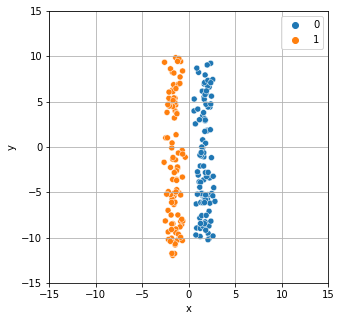

In [5]:
plot_data_points(X, y, xlim=(-15, 15), ylim=(-15, 15))

Как видно, наши данные идеально разделяются прямой $x=0$

Функция $plot\_knn\_bound$ принимает на вход объекты $X$, метки классов $y$, метод нормализации признаков $scaler$, число соседей $n\_neighbors$ и границы рисунка $xlim$, $ylim$. Функция обучает $KNN$ классификатор с числом соседей $n\_neighbors$ и визуализирует разделяющую поверхность для классов, полученную с помощью обученного $KNN$ классификатора.

* Если вы не можете различить _выбранные нами цвета_, то измените список цветов в переменных cmap_light и cmap_bold. Актуальный список возможных цветов находится [здесь](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [6]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def plot_knn_bound(X, y, scaler=None, n_neighbors=10, xlim=(-15, 15), ylim=(-20, 20)):
    # step size in the mesh
    h = 0.05

    # Create color maps
    cmap_light = ListedColormap(['C0', 'orange', 'cyan', 'green'][:np.unique(y).shape[0]])
    cmap_bold = ['C0', 'orange', 'c', 'darkgreen'][:np.unique(y).shape[0]]

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    X_scaled = X # if scaler is None
    if scaler is not None:
        grid = scaler.transform(grid)
        X_scaled = scaler.transform(X)

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm='brute')
    clf.fit(X_scaled, y)

    Z = clf.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    #     # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Разделющие поверхности алгоритма {}-NN'.format(n_neighbors))
    plt.grid()
    plt.show()

Нарисуем разделющие поверхности $1$-$NN$ и $10$-$NN$

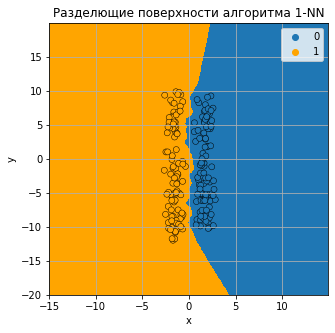

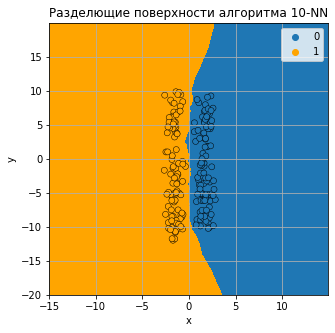

In [7]:
plot_knn_bound(X, y, n_neighbors=1)
plot_knn_bound(X, y, n_neighbors=10)

**Задание 1.2** (кросс, 2 балла) Чем отличаются поверхности, полученные при числе соседей 1 и 10? Объясните, чем вызваны данные отличия

**Ответ:** разделяющая поверхность, полученная при числе соседей 10, более гладкая, чем полученная при числе соседей 1.
Объясняется это тем, что алгоритм с одним соседом намного сильнее реагирует на выбросы: если один объект из, например, оранжевого класса, слегка выступает в область синих объектов, то объекты синего класса, оказавшиеся слишком близко к этому "выбросу", будут неправильно классифицироваться. В случае с 10 соседями "выброс" будет оказывать меньшее влияние, т.к. учитываются "голоса" других соседей.

**Задание 1.3** (кросс, 3 балла) Объясните, почему наблюдается сильное отклоенние разделяющей поверхности от прямой $x=0$ при значениях $y < -10$ и $y > 10$

**Ответ:** Объекты обеих классов расположены в "полосах", симметрчных относительно х = 0, но левая (оранжевая) полоса больше синей с обеих концов. Из-за этого оранжевый класс выступает в полупространствах y > 10 и y < -10, объектов первого (оранжевого) класса в них больше, поэтому классификатор проводит разделяющую поверхность, отклоняющуюся в сторону нулевого (синего) класса.

Данную проблему может решить нормализация признакового пространства. 

**Задание 1.4** (кросс, 1 балл) Начертите разделяющие поверхности для $KNN$, обученного на нормализованных признаках с помощью реализованных вами нормализаторов. Используйте функцию $plot\_knn\_bound$

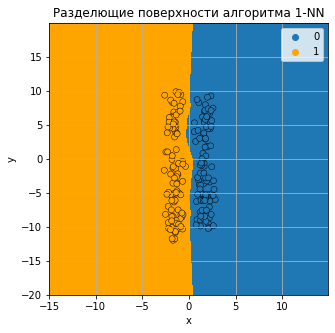

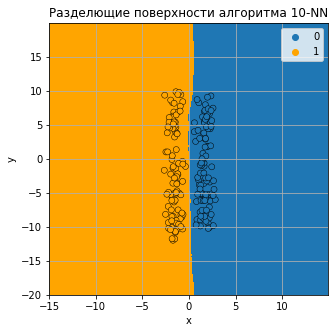

In [8]:
#ваш код, нормализация с StandardScaler
scaler = StandardScaler()
scaler.fit(X)

plot_knn_bound(X, y, n_neighbors=1, scaler=scaler)
plot_knn_bound(X, y, n_neighbors=10, scaler=scaler)

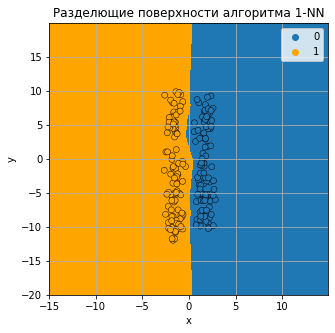

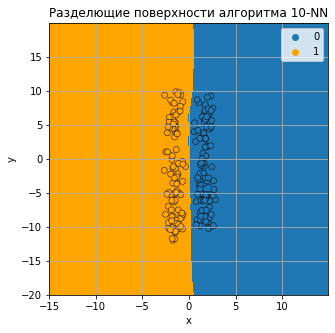

In [9]:
#ваш код, нормализация с MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

plot_knn_bound(X, y, n_neighbors=1, scaler=scaler)
plot_knn_bound(X, y, n_neighbors=10, scaler=scaler)

**Задание 1.5** (кросс, 4 балла) Пусть дано произвольное число точек на плоскости. Представим, что каждая точка - это отдельный класс. Пусть на данной выборке был обучен $1$-$NN$ классификатор. Чем с геометрической точки зрения являются раделяющие поверхности этого классификатора? Приведите доказательство для произвольного числа точек

В качестве примера ниже представлена визуализация для четырех точек

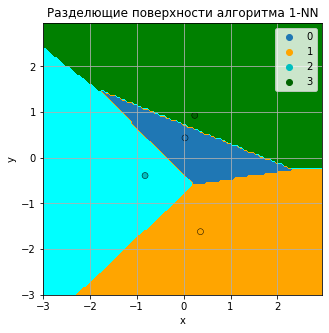

In [10]:
X = np.random.randn(4, 2)
y = np.arange(4)
plot_knn_bound(X, y, n_neighbors=1, xlim=(-3, 3), ylim=(-3, 3))

**Ответ:** разделяющими поверхностями в таком случае будут прямые линии (отрезки, лучи). <br>
Доказательство: <br>
Такая форма разделяющих поверхностей обусловлена тем, что разделяющей поверхности для двух точек является прямая - срединный перпендикуляр к отрезку, соединяющему эти точки. <br>
В случае нескольких точек вид разделяющей поверхности в некоторой области пространства зависит лишь от ДВУХ ближайших соседей, т.е. там она имеет вид прямой. Рассмотрим пару ближайших точек нашей обучающей выборки. При перемещении по их разделяющей поверхности ближайшие два соседа могут меняться, из-за чего прямые в этих местах кончаются, и начинаются новые.



# Часть 2. Кросс-валидация на задаче регрессии

При решении прикладных задач, как правило, доступна лишь обучающая выборка. Для того чтобы иметь возможность оценить качество модели на тестовой выборке, прибегают к методу, называемому кросс-валидация. Пусть зафиксирован некоторый набор параметров модели. В $KNN$ под параметрами могут пониматься число соседей, метрика близости $\rho$, стратегия выбора весов $w_i$. При кросс-валидации **обучающая** выборка делится на $n$ равных частей (folds). Затем обучаются $n$ моделей с заданными параметрами (у всех моделей параметры одинаковые и фиксированы) - $i$-ая модель обучается на всей обучающей выборке, кроме объектов, которые попали в $i$-ый фолд (out-of-fold). Затем измеряется качество $i$-ой модели на $i$-ом фолде. Так как он не участвовал в обучении этой модели, то полученная оценка качества модели будет являться корректной. Финальным значением метрики качества для модели с заданными параметрами является среднее полученных нами значений на $n$ фолдах.

Принцип работы кросс-валидации схематично изображен на рисунке.

<img src="cross-val.png" style="width: 700px;">

**Задание 2.1** (тест, 10 баллов) В модуле cross\_val.py реализуйте функции

* $kfold\_split$, которая реализует генерацию индексов обучающей и валидационной выборок для кросс-валидации
* $knn\_cv\_score$, которая реализует кросс-валидацию для $KNN-$модели

Далее будем решать задачу предсказания цены дома в Бостоне с помощью $KNN$-регрессии. В качестве метрики качества будем использовать $R^2-$score.

$R^2(y\_true, y\_predict) = 1 - \frac{\sum_{i=1}^{n} (y\_true_i - y\_predict_i)^2}{\sum_{i=1}^{n} (y\_true_i - E(y\_true))^2}$

Наилучшее значение метрики равно $1.0$, метрика может принимать отрицательные значения

In [11]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [12]:
X, y = load_boston(return_X_y=True)

C:\Users\antpl_0n4duwv\anaconda3\envs\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

**Задание 2.2** (кросс, 1 балл) Разбейте выборку на обучающую (75%) и тестовую (25%) с помощью функции $train\_test\_split$. Используйте параметр **random_state=42!** Не забудьте перемешать данные перед разбиением (см. параметры функции). Запустите кросс-валидацию на 3 фолдах с помощью реализованных вами функций $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $r2\_score$. Параметры для перебора описаны ниже

In [13]:
# ваш код
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)

In [14]:
from sklearn.metrics import r2_score

parameters = {
    'n_neighbors': [1, 5, 10],
    'metrics': ['euclidean', 'cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(None, 'None'), (MinMaxScaler(), 'MinMax'), (StandardScaler(), 'Standard')]
}
score_function = r2_score

Положите файл cross_val.py в одну директорию с jupyter ноутбуком

In [15]:
from cross_val import kfold_split, knn_cv_score
from sklearn.neighbors import KNeighborsRegressor

folds = kfold_split(X_train.shape[0], 3)
models_score = knn_cv_score(X_train, y_train, parameters, score_function, folds, KNeighborsRegressor)

**Задание 2.3** (кросс, 3 балла) Какой наибольший $r2\_score$ удалось достичь на валидации? Какие закономерности вы видите? Обучите модель с наилучшими параметрами на всей обучающей выборке, измерьте $r2\_score$ на тестовой выборке.

In [16]:
# наибольший r2_score на валидации и параметры модели, на которой он достигается
models_params = [key for key in models_score.keys()]
max_key = models_params[0]
for params in models_params:
    if models_score[max_key] < models_score[params]:
        max_key = params

print(f"Лучший r2_score равен {models_score[max_key]}")
print(f"Достигнут на модели с параметрами {max_key}")

Лучший r2_score равен 0.7794819934795196
Достигнут на модели с параметрами ('MinMax', 5, 'cosine', 'distance')


Выведите результаты кросс-валидации

In [17]:
for key, value in models_score.items():
    print(key, value.round(4))

('None', 1, 'euclidean', 'uniform') 0.328
('None', 1, 'euclidean', 'distance') 0.328
('None', 1, 'cosine', 'uniform') 0.2707
('None', 1, 'cosine', 'distance') 0.2707
('None', 5, 'euclidean', 'uniform') 0.4073
('None', 5, 'euclidean', 'distance') 0.4618
('None', 5, 'cosine', 'uniform') 0.4563
('None', 5, 'cosine', 'distance') 0.4997
('None', 10, 'euclidean', 'uniform') 0.3671
('None', 10, 'euclidean', 'distance') 0.4545
('None', 10, 'cosine', 'uniform') 0.3966
('None', 10, 'cosine', 'distance') 0.5062
('MinMax', 1, 'euclidean', 'uniform') 0.7204
('MinMax', 1, 'euclidean', 'distance') 0.7204
('MinMax', 1, 'cosine', 'uniform') 0.7141
('MinMax', 1, 'cosine', 'distance') 0.7141
('MinMax', 5, 'euclidean', 'uniform') 0.64
('MinMax', 5, 'euclidean', 'distance') 0.7246
('MinMax', 5, 'cosine', 'uniform') 0.6564
('MinMax', 5, 'cosine', 'distance') 0.7795
('MinMax', 10, 'euclidean', 'uniform') 0.6035
('MinMax', 10, 'euclidean', 'distance') 0.6881
('MinMax', 10, 'cosine', 'uniform') 0.6036
('MinMax

**Наблюдаемые закономерности**: <br>
1) При количестве соседей == 1 параметр весов не оказывает никакого влияния на r2_score (что логично). <br>
2) Значение r2_score для ненормализованных данных в большинстве случаев < 0.5 (только одна модель достигла значения 0.506). <br>
3) Модели, обученные с весами 'distance' (при прочих равных), всегда дают результат не хуже, чем модели, обученные с весами 'uniform'. <br>

Лучший r2_score равен 0.7794819934795196 <br>
Достигнут на модели с параметрами ('MinMax', 5, 'cosine', 'distance')

Обучите модель с лучшими по валидации параметрами на обучающей выборке

In [18]:
# обучим KNeighborsRegressor по выборке всей обучающей выборке с параметрами ('MinMax', 5, 'cosine', 'distance')

knn_reg = KNeighborsRegressor(n_neighbors=5, metric='cosine', weights='distance')

# Масштабирование данных
scaler = MinMaxScaler()
scaler.fit(X_train)

knn_reg.fit(scaler.transform(X_train), y_train)
y_pred = knn_reg.predict(scaler.transform(X_test))

print(f"r2_score на тестовой выборке: {r2_score(y_test, y_pred)}")

r2_score на тестовой выборке: 0.744427085333688


# Часть 3. Работа с текстовыми данными

Далее будем решать задачу классификации новостного текста к одному из 20 классов, каждый класс соответствует определенной новостной тематике. В качестве метрики качества будем использовать $accuracy\_score$. Accuracy - это доля верно классифицированных объектов, среди всех объектов выборки.

In [19]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [20]:
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True, random_state=42)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [21]:
print(X_train[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







Как мы видим, объектами обучающей выборки являются тексты. Сырые текстовые данные не могут служить обучающими примерами для алгоритма $KNN$. Перед использованием $KNN$ текстовые данные переменной длины необходимо отобразить в метрическое пространство фиксированной размерности.

Работа с текстовыми данными проходит в несколько этапов.

* **Токенизация.** Текстовая строка делится на токены. Как правило, в качестве токенов выступают отдельные слова и знаки препинания.

* **Нормализация.** Приведение к нижнему регистру, удаление стоп-слов, удаление пунктуации, удаление редких и частотных слов и т.д.

* **Векторизация.** Фиксируется словарь токенов $V$ по **обучающей** выборке. Текст представлется в виде вектора длиной $|V|$, где каждый признак есть функция от частоты встречаемости токена в тексте и в обучающей выборке.

В данном задании будет использовано два вида векторизации. Первый, $CountVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа. Второй, $TfidfVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа умноженную на величину обратно пропорциональную частоте встречаемости токена во всех документах **обучающей** выборки. Подробне про $tf-idf$ можно прочитать [здесь](https://ru.wikipedia.org/wiki/TF-IDF).

В sklearn все векторизаторы автоматически токенизируют текст и приводят его к нижнему регистру. Параметры $max\_df$ и $min\_df$ позволяют убрать из словаря наиболее частые и наиболее редкие токены. Параметр $stop\_words$ позволяет убрать из словаря стоп-слова (малоинформативные слова для данного языка, например, союзы).

In [22]:
count_vec = CountVectorizer(max_df=0.8, min_df=10, stop_words='english')
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, stop_words='english')

**Задание 3.1** (кросс, 2 балла) Найдите оптимальные параметры обучения модели. Осуществлять перебор параметров следует по заданной ниже сетке. Используйте реализованные вами функции $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $accuracy\_score$.

In [23]:
from sklearn.metrics import accuracy_score

parameters = {
    'n_neighbors': [i for i in range(1, 11)],
    'metrics': ['euclidean', 'cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(count_vec, 'CountVectorizer'), (tf_idf, 'TfidfVectorizer')]
}

In [24]:
#ваш код
from sklearn.neighbors import KNeighborsClassifier

# по аналогии с предыдущей задачей, кросс-валидацию будем проводить по трем фолдам
folds = kfold_split(X_train.shape[0], 3)
models_score = knn_cv_score(X_train, y_train, parameters, accuracy_score, folds, KNeighborsClassifier)

for key, value in models_score.items():
    print(key, value.round(5))

('CountVectorizer', 1, 'euclidean', 'uniform') 0.58458
('CountVectorizer', 1, 'euclidean', 'distance') 0.58458
('CountVectorizer', 1, 'cosine', 'uniform') 0.77179
('CountVectorizer', 1, 'cosine', 'distance') 0.77179
('CountVectorizer', 2, 'euclidean', 'uniform') 0.48383
('CountVectorizer', 2, 'euclidean', 'distance') 0.58405
('CountVectorizer', 2, 'cosine', 'uniform') 0.71911
('CountVectorizer', 2, 'cosine', 'distance') 0.77179
('CountVectorizer', 3, 'euclidean', 'uniform') 0.47216
('CountVectorizer', 3, 'euclidean', 'distance') 0.57415
('CountVectorizer', 3, 'cosine', 'uniform') 0.72742
('CountVectorizer', 3, 'cosine', 'distance') 0.77081
('CountVectorizer', 4, 'euclidean', 'uniform') 0.46959
('CountVectorizer', 4, 'euclidean', 'distance') 0.56328
('CountVectorizer', 4, 'cosine', 'uniform') 0.72424
('CountVectorizer', 4, 'cosine', 'distance') 0.76701
('CountVectorizer', 5, 'euclidean', 'uniform') 0.46924
('CountVectorizer', 5, 'euclidean', 'distance') 0.5472
('CountVectorizer', 5, 'co

In [25]:
# Оптимальные параметры по кросс-валидации
models_params = [key for key in models_score.keys()]
max_key = models_params[0]
for params in models_params:
    if models_score[max_key] < models_score[params]:
        max_key = params

print(f"Лучший accuracy_score равен {models_score[max_key]}")
print(f"Достигнут на модели с параметрами {max_key}")

Лучший accuracy_score равен 0.7888454090344923
Достигнут на модели с параметрами ('TfidfVectorizer', 1, 'euclidean', 'uniform')


**Задание 3.2** (кросс, 2 балла) Какой метод предобработки данных в среднем дает наилучший результат? Почему?

In [26]:
# ваш код
tfidf_vec_score = []
count_vec_score = []

for key, value in models_score.items():
    if key[0] == 'CountVectorizer':
        count_vec_score.append(value)
    else:
        tfidf_vec_score.append(value)

print(f"Средняя точность при TfidfVectoriszer: {np.mean(tfidf_vec_score)}")
print(f"Средняя точность при CountVectorizer: {np.mean(count_vec_score)}")

Средняя точность при TfidfVectoriszer: 0.7688237275756764
Средняя точность при CountVectorizer: 0.6267627473259445


**Ответ:** TF-IDF-векторизация дает значительно более высокую среднюю точность в сравнении с Count-векторизацией. Вероятно, это связано с тем, что частота токена в документе (т.е. то, что подсчитывает count-векторизация) учитывается в TF-IDF-векторе, но в  TF-IDF-векторе дополнительно учитывается частота встречаемости токена в текстах всей выборки: если токен встречается лишь в небольшом количестве текстов, то значение TF-IDF-преобразования будет выше, что логично - два текста с токенами, которые в принципе редко встречаются в выборке текстов, скорее окажутся ближе, т.е. в одном классе.

**Задание 3.3** (кросс, 2 балла) Какая метрика близости позволяет в среднем достичь наилучшее качество? Почему?

In [27]:
# ваш код
euclidean_score = []
cosine_score = []

for key, value in models_score.items():
    if key[2] == 'euclidean':
        euclidean_score.append(value)
    else:
        cosine_score.append(value)

print(f"Средняя точность при метрике euclidean: {np.mean(euclidean_score)}")
print(f"Средняя точность при метрике cosine: {np.mean(cosine_score)}")

Средняя точность при метрике euclidean: 0.6372319541028588
Средняя точность при метрике cosine: 0.758354520798762


**Ответ:** Косинусная метрика в среднем позволяет достичь значительно лучшей точности, чем евклидова. Это можно объяснить тем, что, вообще говоря, тексты одной тематики, но разных размеров (например, соотношение размеров 1:10) будут иметь разные частоты для одних и тех же токенов (в силу того, что в большом тексте процент содержания ключевых слов будет несколько меньше, поскольку в нем будет больше слов общего характера), но при этом "направления" их векторов в признаковом пространстве будет одним и тем же. Также косинусная метрика скорее отнесет текста одной тематики, но различных размеров к одному классу, т.к. вектор частот большого текста будет иметь меньше нулей в сравнении с векторным представлением маленького, так что евклидово расстояние между ними будет выше, чем косинусное)

**Задание 3.4** (кросс, 2 балла) Начертите график зависимости метрики качества от числа соседей. Метрику следует усреднить по всем параматрам, кроме числа соседей. Сделайте выводы о наблюдаемых зависимостях (возможно будет полезным ознакомиться с названиями классов)

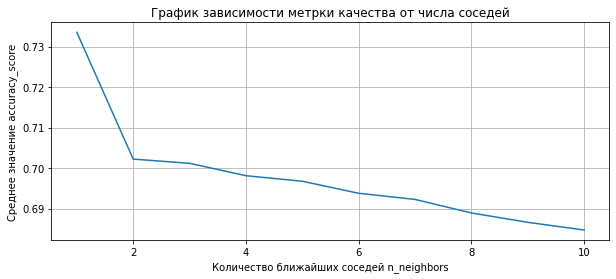

In [28]:
# ваш код
n_neighbors_list = [i for i in range(1, 11)]
score_per_n_neighbors = [[] for i in range(1, 11)]

for key, value in models_score.items():
    score_per_n_neighbors[key[1] - 1].append(value)

mean_score_per_n_neighbors = [np.mean(l) for l in score_per_n_neighbors]

plt.figure(figsize=(10, 4))

plt.title('График зависимости метрки качества от числа соседей')

plt.plot(n_neighbors_list, mean_score_per_n_neighbors)
plt.grid()

plt.xlabel('Количество ближайших соседей n_neighbors')
plt.ylabel('Среднее значение accuracy_score')
plt.show()

In [29]:
fetch_20newsgroups().target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

**Ответ:** анализ графика показывает, что модели с n_neighbors == 1 в среднем достигают наилучшей точности, чем модели с бОльшим количеством соседей. В предыдущей ячейке показаны тематики всех текстов. Их можно разбить на более крупные группы (компьютеры, спорт, политика и т.д.), т.е. некоторые классы довольно близки между собой. Поэтому обучение knn при большем количестве соседей дает меньшую точность.

**Задание 3.5** (кросс, 3 балла) Оцените точность вашей лучшей модели на тестовой части датасета. Отличается ли оно от качества, полученного на кросс-валидации? Почему?

In [30]:
#ваш код
knn_clf = KNeighborsClassifier(n_neighbors=1, metric='euclidean', weights='uniform')

# преобразуем тексты в вектор
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
vec_X_train = vectorizer.transform(X_train)

knn_clf.fit(vec_X_train, y_train)

# предсказываем метки классов для текстов из тестовой выборки
y_pred = knn_clf.predict(vectorizer.transform(X_test))

# точность предсказания
accuracy_score(y_test, y_pred)

0.6724641529474243

In [31]:
X_train.shape[0], X_test.shape[0]

(11314, 7532)

**Ответ:** в результате обучения модели с наилучшими (по кросс-валидации на обучающей выборке) параметрами по всей обучающей выборке получили точность на тестовой выборке, равную 0.67 - значительно меньшую, чем была на кросс-валидации (0.78). <br>
Это связано с тем, что knn-классификатор с одним ближайшим соседом очень чувствителен к выбросам, при этом размер обучающей выборки всего в 1.57 раз больше, чем размер тестовой.

**(!)** А теперь перезапустите ноутбук: Kernel -> Restart & Run All